## Importing Essential Libraries for Data Analysis and Machine Learning

In [3]:
import os
import random as rn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras import regularizers

## Visualizing Randomly Selected Microorganism Images


In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Corrected names of the microorganisms
corrected_names = [
    'Staphylococcus aureus', 'Fusobacterium', 'Escherichia coli', 
    'Lactobacillus paracasei', 'Neisseria gonorrhoeae', 
    'Enterococcus faecalis', 'Candida albicans', 
    'Porphyromonas gingivalis', 'Clostridium perfringens', 
    'Lactobacillus salivarius'
]

# Folder names (with possible errors)
folder_names = [
    'Staphylococcus.aureus', 'Fusobacterium', 'Escherichia.coli', 
    'Lactobacillus.paracasei', 'Neisseria.gonorrhoeae', 
    'Enterococcus.faecalis', 'Candida.albicans', 
    'Porfyromonas.gingivalis', 'Clostridium.perfringens', 
    'Lactobacillus.salivarius'
]

# Path to the directory containing the folders
# base_dir = # Please send a request for the access to data

# Initialize a list to store the selected images and their titles
selected_images = []
titles = []

# Randomly select one image from each folder
for folder, name in zip(folder_names, corrected_names):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        if images:
            selected_image = random.choice(images)
            image_path = os.path.join(folder_path, selected_image)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            selected_images.append(image)
            titles.append(name)

# Plot the images in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for img, title, ax in zip(selected_images, titles, axes):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Plotting Class Distribution of Images

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(input_dir):
    class_counts = {}
    
    # Count the number of images in each class
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    
    # Plotting the class distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

input_dir = '/kaggle/input/dibaas-400-image-per-class/244_400_perclass'
plot_class_distribution(input_dir)

## Plotting Class Distribution as a Pie Chart


In [ ]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(input_dir):
    class_counts = {}
    
    # Count the number of images in each class
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    
    # Plotting the class distribution as a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
    #plt.title('Class Distribution')
    plt.axis('equal') 
    plt.show()

# Example usage
input_dir = '/kaggle/input/dibaas-400-image-per-class/244_400_perclass'
plot_class_distribution(input_dir)

## Analyzing Image Dimensions Distribution


In [ ]:
import cv2
import numpy as np

def plot_image_dimensions(input_dir):
    widths = []
    heights = []
    
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                h, w = img.shape[:2]
                heights.append(h)
                widths.append(w)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=30, color='blue', edgecolor='black')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Widths')
    
    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=30, color='green', edgecolor='black')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Heights')
    
    plt.show()


input_dir = '/kaggle/input/dibaas-400-image-per-class/244_400_perclass'
plot_image_dimensions(input_dir)

## Splitting and Resizing Dataset for Training, Validation, and Testing

In [10]:
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = '/kaggle/input/dibaas-400-image-per-class/244_400_perclass'
output_path = '/kaggle/working/split-dataset'

# Create output directories
os.makedirs(output_path, exist_ok=True)
train_dir = os.path.join(output_path, 'train')
val_dir = os.path.join(output_path, 'val')
test_dir = os.path.join(output_path, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the class folders
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

def copy_and_resize(src, dst, size=(224, 224)):
    img = cv2.imread(src)
    if img is not None:
        img_resized = cv2.resize(img, size)
        cv2.imwrite(dst, img_resized)
    else:
        print(f"Failed to read {src}")

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    images = os.listdir(cls_path)
    
    # Split the data
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)
    val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.5, random_state=42)
    
    # Create class directories in train, val, and test folders
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    
    # Copy and resize images to train folder
    for img in train_imgs:
        src = os.path.join(cls_path, img)
        dst = os.path.join(train_dir, cls, img)
        copy_and_resize(src, dst)
    
    # Copy and resize images to val folder
    for img in val_imgs:
        src = os.path.join(cls_path, img)
        dst = os.path.join(val_dir, cls, img)
        copy_and_resize(src, dst)
    
    # Copy and resize images to test folder
    for img in test_imgs:
        src = os.path.join(cls_path, img)
        dst = os.path.join(test_dir, cls, img)
        copy_and_resize(src, dst)

print("Dataset split and resizing completed.")

Dataset split and resizing completed.


## Counting Images in Dataset Folders

In [11]:
import os

def count_images_in_folders(root_dir):
    # Iterate through the three main folders
    for main_folder in os.listdir(root_dir):
        main_folder_path = os.path.join(root_dir, main_folder)
        if os.path.isdir(main_folder_path):
            print(f"Main Folder: {main_folder}")
            
            # Iterate through the 10 subfolders
            for sub_folder in os.listdir(main_folder_path):
                sub_folder_path = os.path.join(main_folder_path, sub_folder)
                if os.path.isdir(sub_folder_path):
                    # Count the number of images in the subfolder
                    num_images = len([f for f in os.listdir(sub_folder_path) if os.path.isfile(os.path.join(sub_folder_path, f))])
                    print(f"  Subfolder: {sub_folder} - Number of images: {num_images}")

root_directory = '/kaggle/working/split-dataset'

count_images_in_folders(root_directory)

Main Folder: train
  Subfolder: Fusobacterium - Number of images: 320
  Subfolder: Staphylococcus.aureus - Number of images: 320
  Subfolder: Porfyromonas.gingivalis - Number of images: 320
  Subfolder: Clostridium.perfringens - Number of images: 320
  Subfolder: Lactobacillus.salivarius - Number of images: 320
  Subfolder: Escherichia.coli - Number of images: 320
  Subfolder: Enterococcus.faecalis - Number of images: 320
  Subfolder: Lactobacillus.paracasei - Number of images: 320
  Subfolder: Candida.albicans - Number of images: 320
  Subfolder: Neisseria.gonorrhoeae - Number of images: 320
Main Folder: val
  Subfolder: Fusobacterium - Number of images: 40
  Subfolder: Staphylococcus.aureus - Number of images: 40
  Subfolder: Porfyromonas.gingivalis - Number of images: 40
  Subfolder: Clostridium.perfringens - Number of images: 40
  Subfolder: Lactobacillus.salivarius - Number of images: 40
  Subfolder: Escherichia.coli - Number of images: 40
  Subfolder: Enterococcus.faecalis - Numb

## Random Image Generated For Checking

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images
def plot_images(generator, title):
    # Get a batch of images and labels
    images, labels = next(generator)
    
    # Select 3 random images
    indices = np.random.choice(range(len(images)), 3, replace=False)
    selected_images = images[indices]
    
    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, img in enumerate(selected_images):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{title} Image {i+1}")
        plt.axis('off')
    plt.show()

plot_images(train_generator, "Train")
plot_images(validation_generator, "Validation")
plot_images(test_generator, "Test")

## VGG16 (model_1):

In [15]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

class MyEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, accuracy_threshold=0.90):
        super(MyEarlyStopping, self).__init__()
        self.accuracy_threshold = accuracy_threshold

    def on_epoch_end(self, epoch, logs=None):
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        if train_accuracy is not None and val_accuracy is not None:
            if train_accuracy >= self.accuracy_threshold and val_accuracy >= self.accuracy_threshold:
                print(f"\nReached desired accuracy (above {self.accuracy_threshold * 100:.2f}% for both), stopping training.")
                self.model.stop_training = True

my_stopping_callback = MyEarlyStopping(accuracy_threshold=0.95) 

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications import VGG16  

# Choose a Pre-trained Model and Load Weights (without the top classification layer):
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

# Freeze Base Model Layers (Optional for Transfer Learning)
base_model.trainable = False

# Creating Model
my_model_5 = models.Sequential([
    base_model,  
    layers.Flatten(),  
    layers.Dense(512, activation='relu'),  
    layers.Dropout(0.5),  
    layers.Dense(10, activation='softmax')  
])

# Compile the Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop 

my_model_5.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(learning_rate=0.0001),  
                  metrics=['accuracy'])

# Reduced LR
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,           # Reduce learning rate by half
    patience=3,          # Wait for 3 epochs without improvement 
    verbose=1,           # Print messages when reducing the LR
    min_lr=1e-6          # Lower bound on the learning rate
)

# Train the Model 
history_5 = my_model_5.fit(train_generator,
                    epochs=30,  
                    validation_data=validation_generator,
                    callbacks=[my_stopping_callback, reduce_lr])

Epoch 1/30
  2/200 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.1094 - loss: 2.6947   

I0000 00:00:1723186724.683257     258 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723186724.708180     258 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5501 - loss: 1.3642

W0000 00:00:1723186773.151515     261 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 73s 251ms/step - accuracy: 0.5507 - loss: 1.3622 - val_accuracy: 0.8925 - val_loss: 0.3074 - learning_rate: 1.0000e-04
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 250ms/step - accuracy: 0.8185 - loss: 0.5278 - val_accuracy: 0.9375 - val_loss: 0.2032 - learning_rate: 1.0000e-04
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 250ms/step - accuracy: 0.8552 - loss: 0.4020 - val_accuracy: 0.9475 - val_loss: 0.1402 - learning_rate: 1.0000e-04
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 252ms/step - accuracy: 0.8849 - loss: 0.3405 - val_accuracy: 0.9500 - val_loss: 0.1590 - learning_rate: 1.0000e-04
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 246ms/step - accuracy: 0.8980 - loss: 0.2883 - val_accuracy: 0.9775 - val_loss: 0.0962 - learning_rate: 1.0000e-04
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 246ms/step - accuracy: 0.9131 - loss: 0.2316 - val_accuracy: 0.9500 - val_loss: 0.1492 - learning_rate: 1.0000e-04
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 51s 247ms/step - 

## Printing All Evaluation Matrices & Graphs:

Final Training Accuracy: 0.9543750286102295
Final Validation Accuracy: 0.9825000166893005
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9778 - loss: 0.0508
Test Loss: 0.061962008476257324
Test Accuracy: 0.9725000262260437


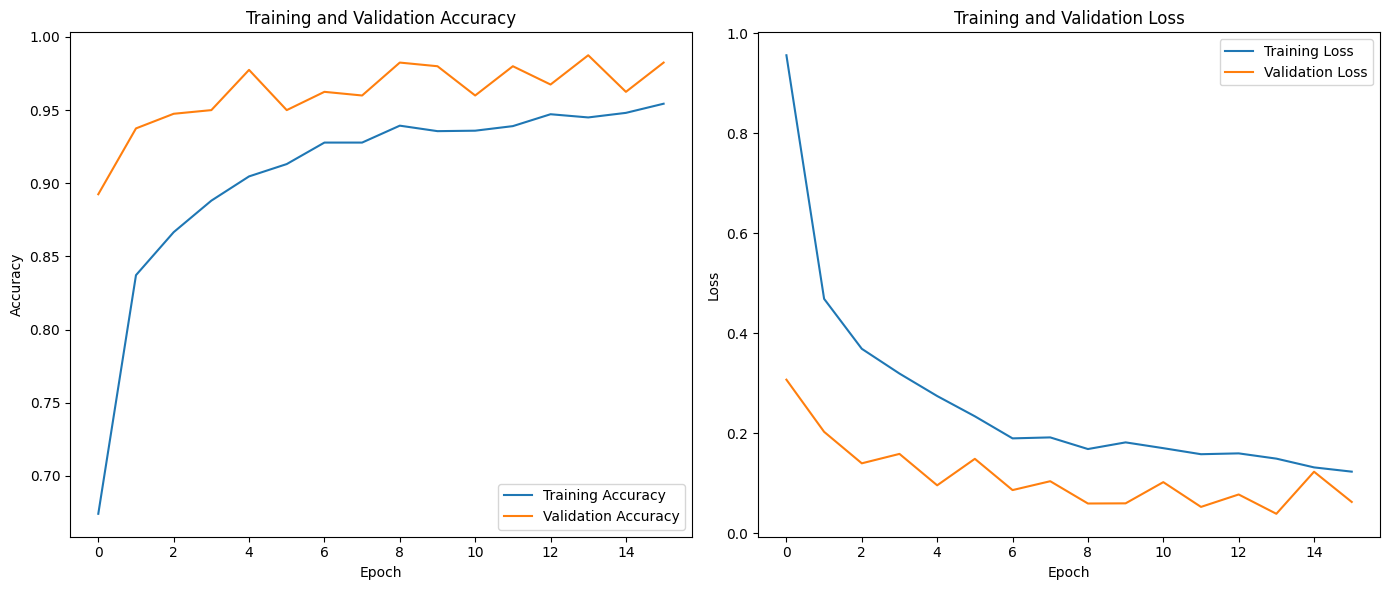

 4/25 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step 

W0000 00:00:1723187604.175329     259 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


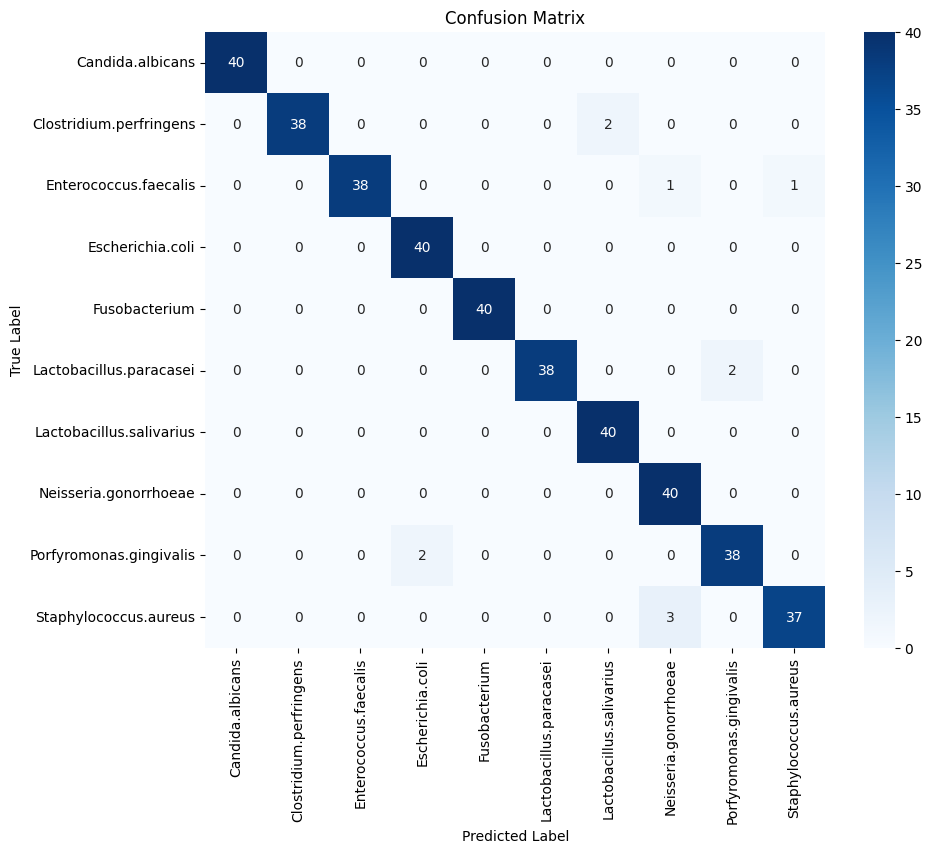


Classification Report:
                          precision    recall  f1-score   support

        Candida.albicans       1.00      1.00      1.00        40
 Clostridium.perfringens       1.00      0.95      0.97        40
   Enterococcus.faecalis       1.00      0.95      0.97        40
        Escherichia.coli       0.95      1.00      0.98        40
           Fusobacterium       1.00      1.00      1.00        40
 Lactobacillus.paracasei       1.00      0.95      0.97        40
Lactobacillus.salivarius       0.95      1.00      0.98        40
   Neisseria.gonorrhoeae       0.91      1.00      0.95        40
 Porfyromonas.gingivalis       0.95      0.95      0.95        40
   Staphylococcus.aureus       0.97      0.93      0.95        40

                accuracy                           0.97       400
               macro avg       0.97      0.97      0.97       400
            weighted avg       0.97      0.97      0.97       400



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def evaluate_and_plot(history, model, test_generator):
    # Extract accuracy and loss from history
    train_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Print final training and validation accuracy
    print("Final Training Accuracy:", train_accuracy[-1])
    print("Final Validation Accuracy:", validation_accuracy[-1])

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Plot training and validation accuracy and loss
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(validation_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion Matrix and Classification Report
    y_true = test_generator.classes
    y_pred_prob = model.predict(test_generator)
    y_pred = np.argmax(y_pred_prob, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    class_names = list(test_generator.class_indices.keys())

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


# Calling the function
evaluate_and_plot(history_5, my_model_5, test_generator)

## MobileNetV2 (model 1)

In [18]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

class MyEarlyStopping(tf.keras.callbacks.Callback):
    def __init__(self, accuracy_threshold=0.90):
        super(MyEarlyStopping, self).__init__()
        self.accuracy_threshold = accuracy_threshold

    def on_epoch_end(self, epoch, logs=None):
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        if train_accuracy is not None and val_accuracy is not None:
            if train_accuracy >= self.accuracy_threshold and val_accuracy >= self.accuracy_threshold:
                print(f"\nReached desired accuracy (above {self.accuracy_threshold * 100:.2f}% for both), stopping training.")
                self.model.stop_training = True

my_stopping_callback = MyEarlyStopping(accuracy_threshold=0.95) 

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications import MobileNetV2  

# Choose a Pre-trained Model and Load Weights (without the top classification layer):
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

# Freeze Base Model Layers (Optional for Transfer Learning)
base_model.trainable = False

# Create Your Model
my_model_6 = models.Sequential([
    base_model,  
    layers.Flatten(),  
    layers.Dense(512, activation='relu'),  
    layers.Dropout(0.5),  
    layers.Dense(10, activation='softmax')  
])

# Compile the Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop 

my_model_6.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(learning_rate=0.0001),  
                  metrics=['accuracy'])

# Reduced LR
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,           # Reduce learning rate by half
    patience=3,          # Wait for 3 epochs without improvement 
    verbose=1,           # Print messages when reducing the LR
    min_lr=1e-6          # Lower bound on the learning rate
)

# Train the Model 
history_6 = my_model_6.fit(train_generator,
                    epochs=30,  
                    validation_data=validation_generator,
                    callbacks=[my_stopping_callback, reduce_lr])

Epoch 1/30
  1/200 ━━━━━━━━━━━━━━━━━━━━ 35:21 11s/step - accuracy: 0.1250 - loss: 3.4983

W0000 00:00:1723187687.743175     259 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.6556 - loss: 2.2708

W0000 00:00:1723187737.421403     261 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


200/200 ━━━━━━━━━━━━━━━━━━━━ 62s 257ms/step - accuracy: 0.6569 - loss: 2.2590 - val_accuracy: 0.9675 - val_loss: 0.0766
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 242ms/step - accuracy: 0.9028 - loss: 0.4318 - val_accuracy: 0.9700 - val_loss: 0.0753
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 242ms/step - accuracy: 0.9242 - loss: 0.3377 - val_accuracy: 0.9925 - val_loss: 0.0115
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 241ms/step - accuracy: 0.9291 - loss: 0.2800 - val_accuracy: 0.9925 - val_loss: 0.0107
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 241ms/step - accuracy: 0.9381 - loss: 0.2528 - val_accuracy: 0.9925 - val_loss: 0.0117
Epoch 6/30
199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9525 - loss: 0.2234
Reached desired accuracy (above 95.00% for both), stopping training.
200/200 ━━━━━━━━━━━━━━━━━━━━ 50s 242ms/step - accuracy: 0.9525 - loss: 0.2236 - val_accuracy: 1.0000 - val_loss: 0.0022


## Printing All Evaluation Matrices & Graphs:

Final Training Accuracy: 0.9528124928474426
Final Validation Accuracy: 1.0
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9966 - loss: 0.0071
Test Loss: 0.005192114040255547
Test Accuracy: 0.9975000023841858


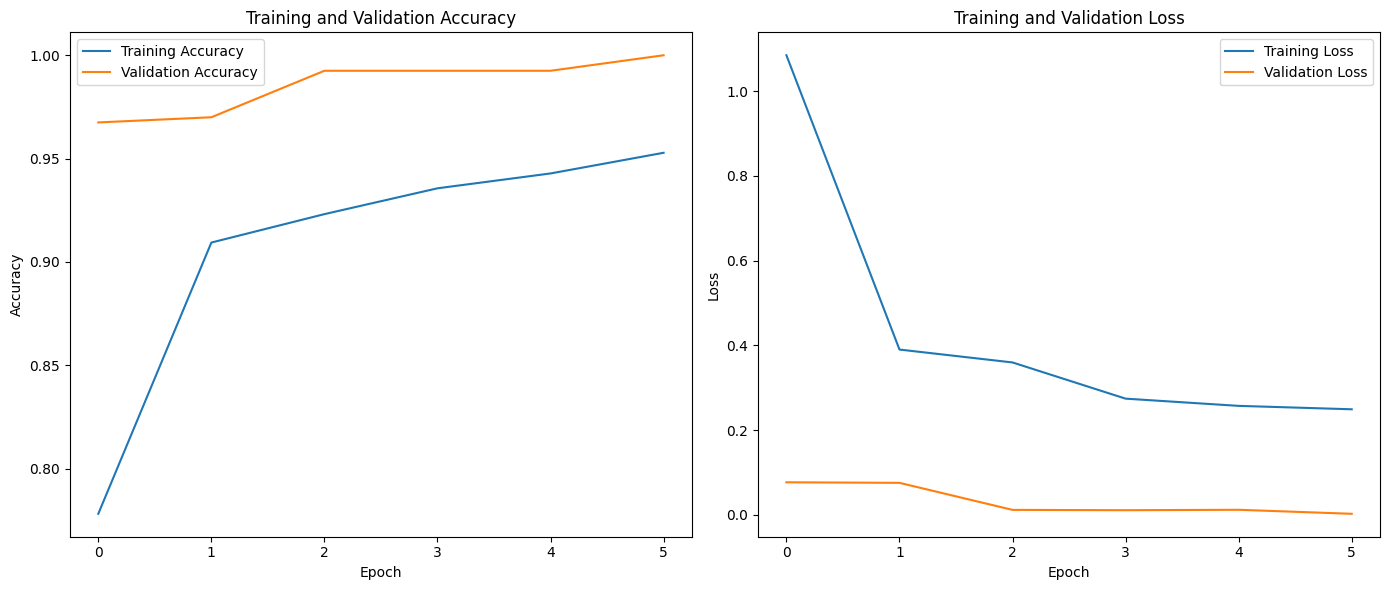

 4/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step

W0000 00:00:1723188003.081848     261 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step


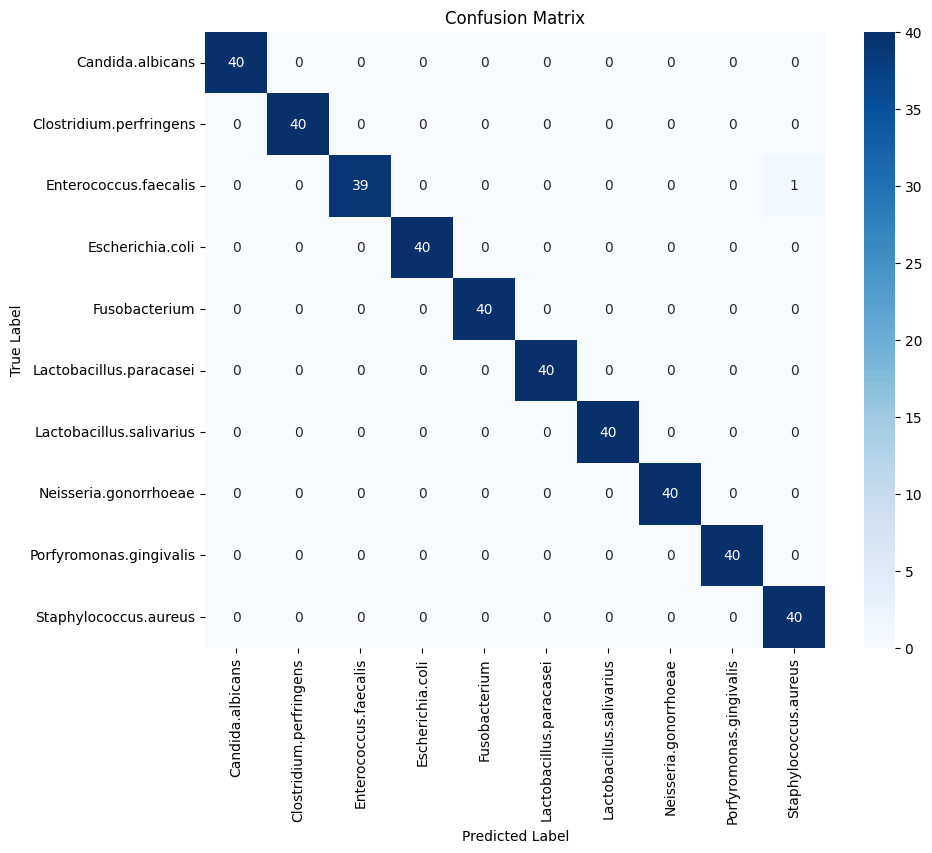


Classification Report:
                          precision    recall  f1-score   support

        Candida.albicans       1.00      1.00      1.00        40
 Clostridium.perfringens       1.00      1.00      1.00        40
   Enterococcus.faecalis       1.00      0.97      0.99        40
        Escherichia.coli       1.00      1.00      1.00        40
           Fusobacterium       1.00      1.00      1.00        40
 Lactobacillus.paracasei       1.00      1.00      1.00        40
Lactobacillus.salivarius       1.00      1.00      1.00        40
   Neisseria.gonorrhoeae       1.00      1.00      1.00        40
 Porfyromonas.gingivalis       1.00      1.00      1.00        40
   Staphylococcus.aureus       0.98      1.00      0.99        40

                accuracy                           1.00       400
               macro avg       1.00      1.00      1.00       400
            weighted avg       1.00      1.00      1.00       400



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def evaluate_and_plot(history, model, test_generator):
    # Extract accuracy and loss from history
    train_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Print final training and validation accuracy
    print("Final Training Accuracy:", train_accuracy[-1])
    print("Final Validation Accuracy:", validation_accuracy[-1])

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Plot training and validation accuracy and loss
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(validation_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion Matrix and Classification Report
    y_true = test_generator.classes
    y_pred_prob = model.predict(test_generator)
    y_pred = np.argmax(y_pred_prob, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    class_names = list(test_generator.class_indices.keys())

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


evaluate_and_plot(history_6, my_model_6, test_generator)